In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv('box_data_60min.csv')


In [4]:
df

,thour,tdate,Ph,Tdelta,Gv,Ph.l0,Ph.l1,Ph.l2,Ph.l3,Ph.l4,...,Gv.l1,Gv.l2,Gv.l3,Gv.l4,Gv.l5,Gv.l6,Gv.l7,Gv.l8,Gv.l9,Gv.l10
0,19,2013-01-30 02:00:00,56,13.253583,-0.498643,56,55,57,57,58,...,-0.499338,-0.417959,-0.221011,-0.453375,-0.747238,-0.669267,-0.451776,-0.142700,8.262339,20.475484
1,20,2013-01-30 03:00:00,54,13.181458,-1.127035,54,56,55,57,57,...,-0.498643,-0.499338,-0.417959,-0.221011,-0.453375,-0.747238,-0.669267,-0.451776,-0.142700,8.262339
2,21,2013-01-30 04:00:00,55,12.968792,-0.643298,55,54,56,55,57,...,-1.127035,-0.498643,-0.499338,-0.417959,-0.221011,-0.453375,-0.747238,-0.669267,-0.451776,-0.142700
3,22,2013-01-30 05:00:00,54,12.667750,-0.456008,54,55,54,56,55,...,-0.643298,-1.127035,-0.498643,-0.499338,-0.417959,-0.221011,-0.453375,-0.747238,-0.669267,-0.451776
4,23,2013-01-30 06:00:00,54,12.605250,-1.534060,54,54,55,54,56,...,-0.456008,-0.643298,-1.127035,-0.498643,-0.499338,-0.417959,-0.221011,-0.453375,-0.747238,-0.669267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,245,2013-02-08 12:00:00,76,23.684292,264.619541,76,90,94,97,97,...,63.320010,39.317716,10.410304,0.189180,-0.065229,-0.205313,-0.687645,-1.081767,-0.497384,-0.136499
227,246,2013-02-08 13:00:00,58,23.389083,217.417135,58,76,90,94,97,...,264.619541,63.320010,39.317716,10.410304,0.189180,-0.065229,-0.205313,-0.687645,-1.081767,-0.497384
228,247,2013-02-08 14:00:00,63,23.231583,248.983866,63,58,76,90,94,...,217.417135,264.619541,63.320010,39.317716,10.410304,0.189180,-0.065229,-0.205313,-0.687645,-1.081767
229,248,2013-02-08 15:00:00,21,22.566833,638.279086,21,63,58,76,90,...,248.983866,217.417135,264.619541,63.320010,39.317716,10.410304,0.189180,-0.065229,-0.205313,-0.687645


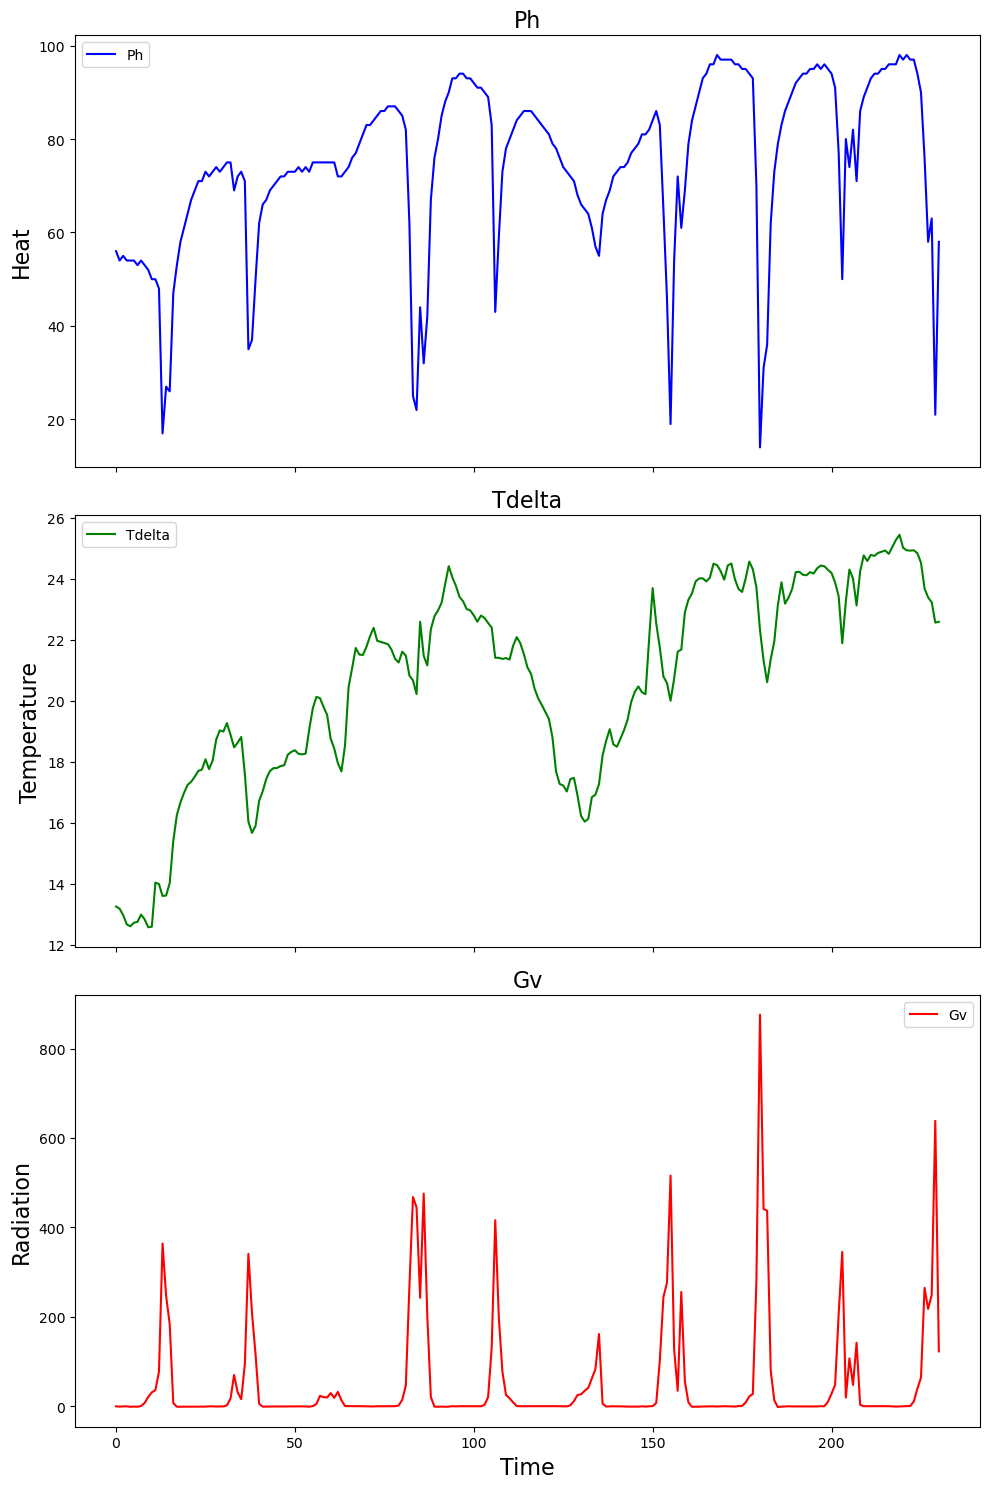

In [25]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

axs[0].plot(df['Ph'], label='Ph', color='blue')
axs[0].set_title('Ph', fontsize=16)
axs[0].set_ylabel('Heat', fontsize=16)
axs[0].legend()

axs[1].plot(df['Tdelta'], label='Tdelta', color='green')
axs[1].set_title('Tdelta', fontsize=16)
axs[1].set_ylabel('Temperature', fontsize=16)
axs[1].legend()

axs[2].plot(df['Gv'], label='Gv', color='red')
axs[2].set_title('Gv', fontsize=16)
axs[2].set_xlabel('Time', fontsize=16)
axs[2].set_ylabel('Radiation', fontsize=16)
axs[2].legend()

plt.tight_layout()
plt.show()

# save the figure
fig.savefig('data_plot.png', dpi=300, bbox_inches='tight')

In [6]:
# data split
df['tdate'] = pd.to_datetime(df['tdate'])
split_date = pd.Timestamp("2013-02-06 00:00:00")

train_df = df[df['tdate'] <= split_date]
test_df = df[df['tdate'] > split_date]

print(f"Train set size: {len(train_df)}")
print(f"Test set size: {len(test_df)}")

Train set size: 167
Test set size: 64


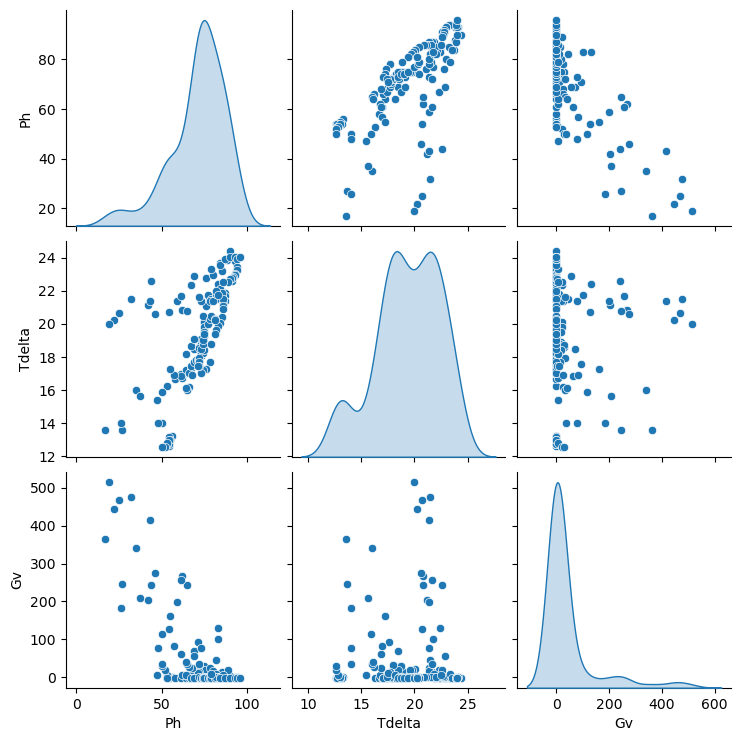

In [28]:
# scatter plots
sns.pairplot(train_df[['Ph', 'Tdelta', 'Gv']], diag_kind='kde')
plt.savefig('scatter_plot.png', dpi=300, bbox_inches='tight')
plt.show()


In [8]:
# before investigating autocorrelation and cross-correlation, we need to check for stationarity

from statsmodels.tsa.stattools import adfuller
def check_stationarity(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("The series is stationary.")
    else:
        print("The series is non-stationary.")

check_stationarity(train_df['Ph'])
check_stationarity(train_df['Tdelta'])
check_stationarity(train_df['Gv'])


ADF Statistic: -4.205929853669767
p-value: 0.0006438356009217498
The series is stationary.
ADF Statistic: -1.979672253282763
p-value: 0.29555661050426985
The series is non-stationary.
ADF Statistic: -5.504463880447422
p-value: 2.0365577426944327e-06
The series is stationary.


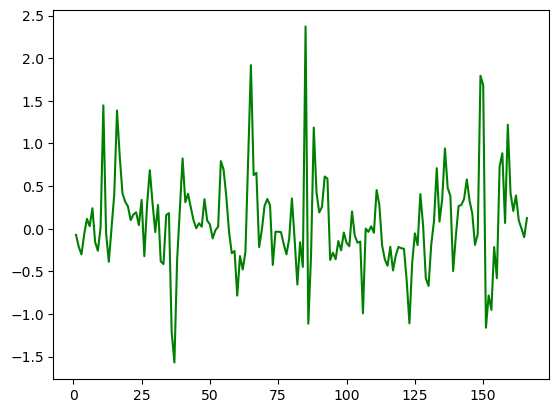

In [9]:
# Tdelta is non-stationary, the mean changes over time, and so we can use differencing to make it stationary
df_stationary = train_df.copy()
df_stationary['Tdelta'] = df_stationary['Tdelta'].diff().dropna()
plt.plot(df_stationary['Tdelta'], label='Tdelta', color='green')
plt.show()

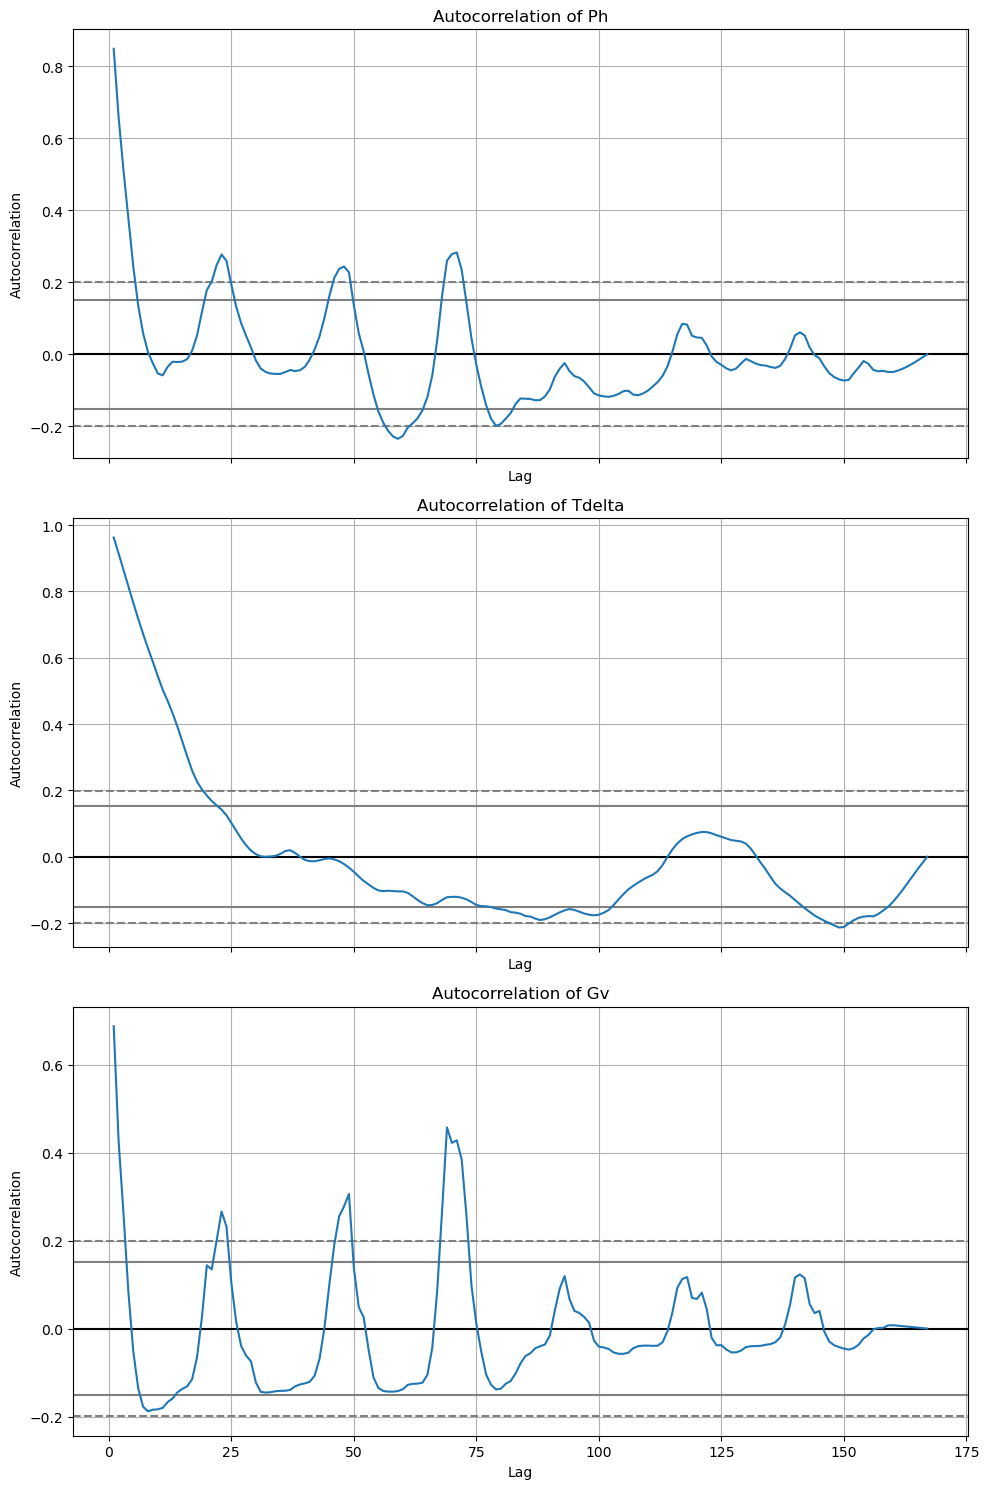

In [10]:
# autocorrelation plot
from pandas.plotting import autocorrelation_plot
fig, axs = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

autocorrelation_plot(train_df['Ph'], ax=axs[0])
axs[0].set_title('Autocorrelation of Ph')
autocorrelation_plot(train_df['Tdelta'], ax=axs[1])
axs[1].set_title('Autocorrelation of Tdelta')
autocorrelation_plot(train_df['Gv'], ax=axs[2])
axs[2].set_title('Autocorrelation of Gv')

plt.tight_layout()
plt.savefig('autocorrelation_plots.png', dpi=300, bbox_inches='tight')
plt.show()

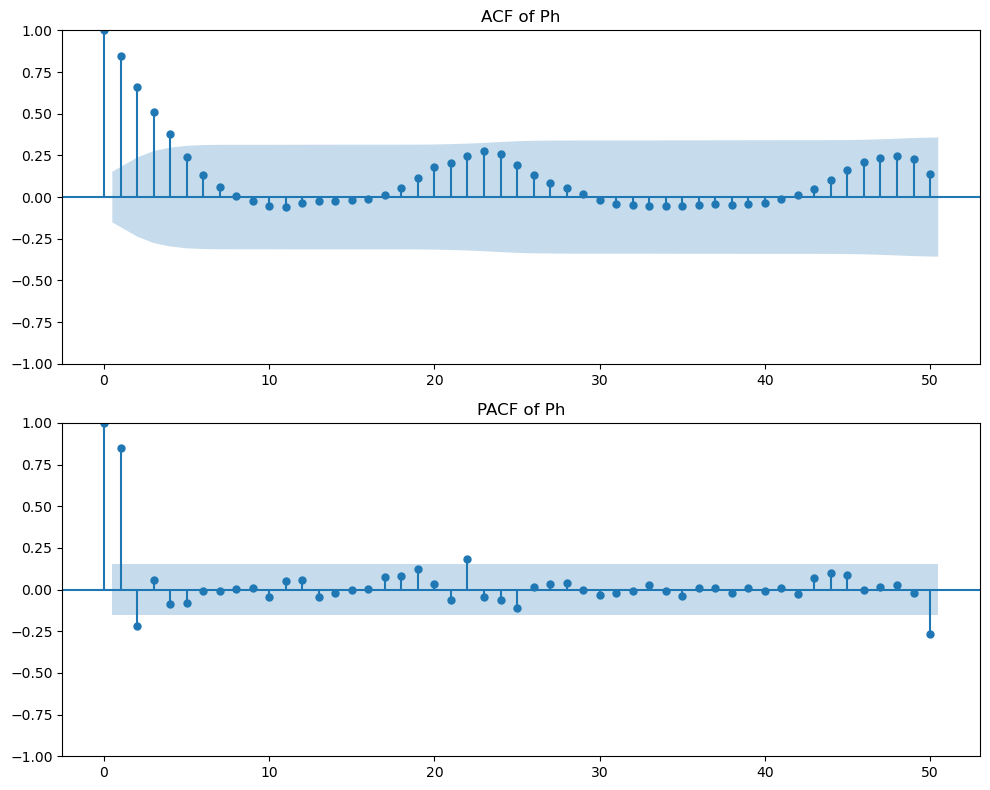

In [11]:
# cross-correlation plot - Ph
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(train_df['Ph'], ax=axs[0], lags=50)
axs[0].set_title('ACF of Ph')
plot_pacf(train_df['Ph'], ax=axs[1], lags=50)
axs[1].set_title('PACF of Ph')
plt.tight_layout()
plt.savefig('acf_pacf_plot.png', dpi=300, bbox_inches='tight')
plt.show()

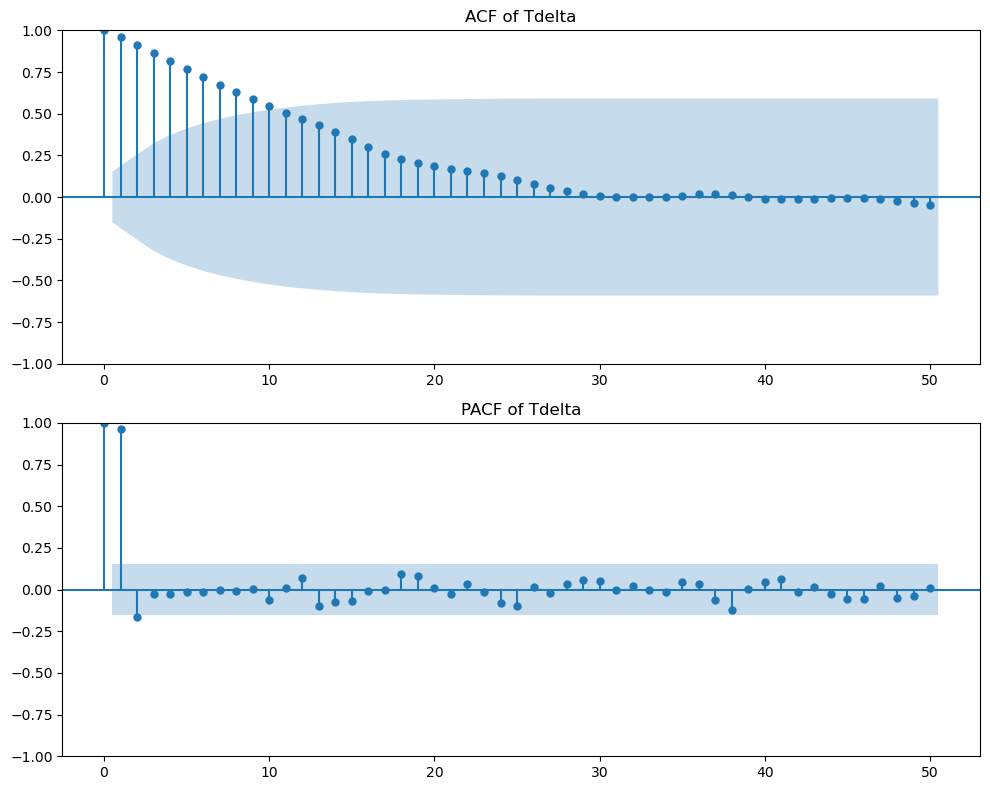

In [12]:
# cross-correlation plot - Tdelta
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(train_df['Tdelta'], ax=axs[0], lags=50)
axs[0].set_title('ACF of Tdelta')
plot_pacf(train_df['Tdelta'], ax=axs[1], lags=50)
axs[1].set_title('PACF of Tdelta')
plt.tight_layout()
plt.savefig('acf_pacf_plot_tdelta.png', dpi=300, bbox_inches='tight')
plt.show()

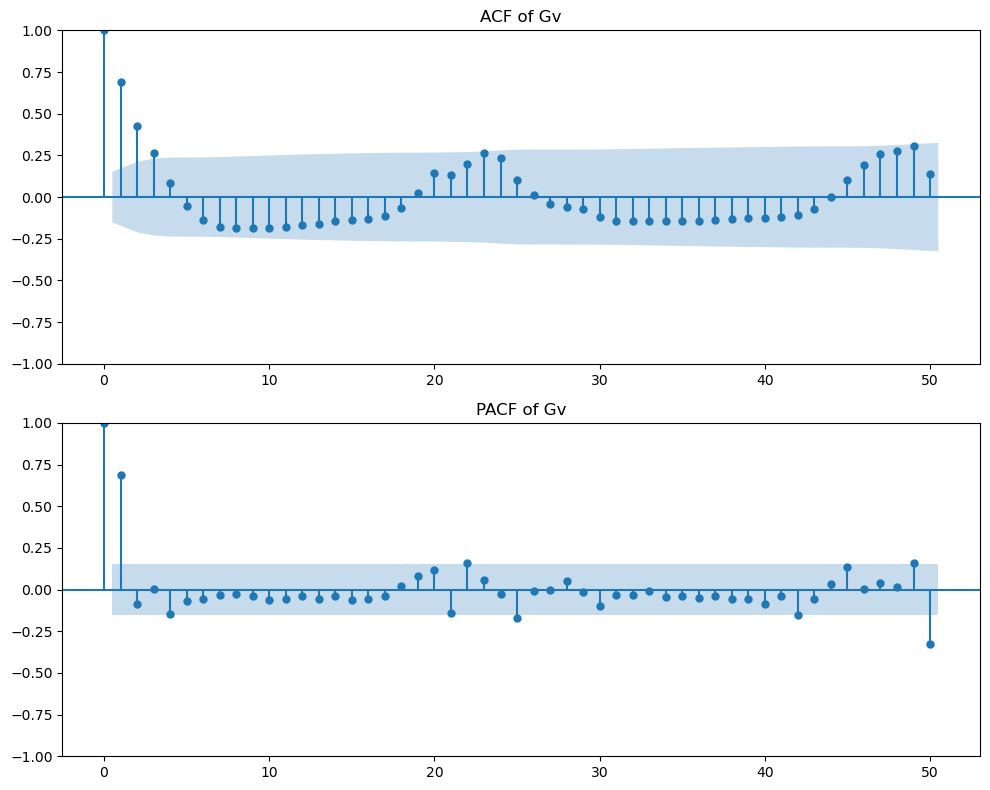

In [13]:
# cross-correlation plot - Gv
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(train_df['Gv'], ax=axs[0], lags=50)
axs[0].set_title('ACF of Gv')
plot_pacf(train_df['Gv'], ax=axs[1], lags=50)
axs[1].set_title('PACF of Gv')
plt.tight_layout()
plt.savefig('acf_pacf_plot_gv.png', dpi=300, bbox_inches='tight')
plt.show()

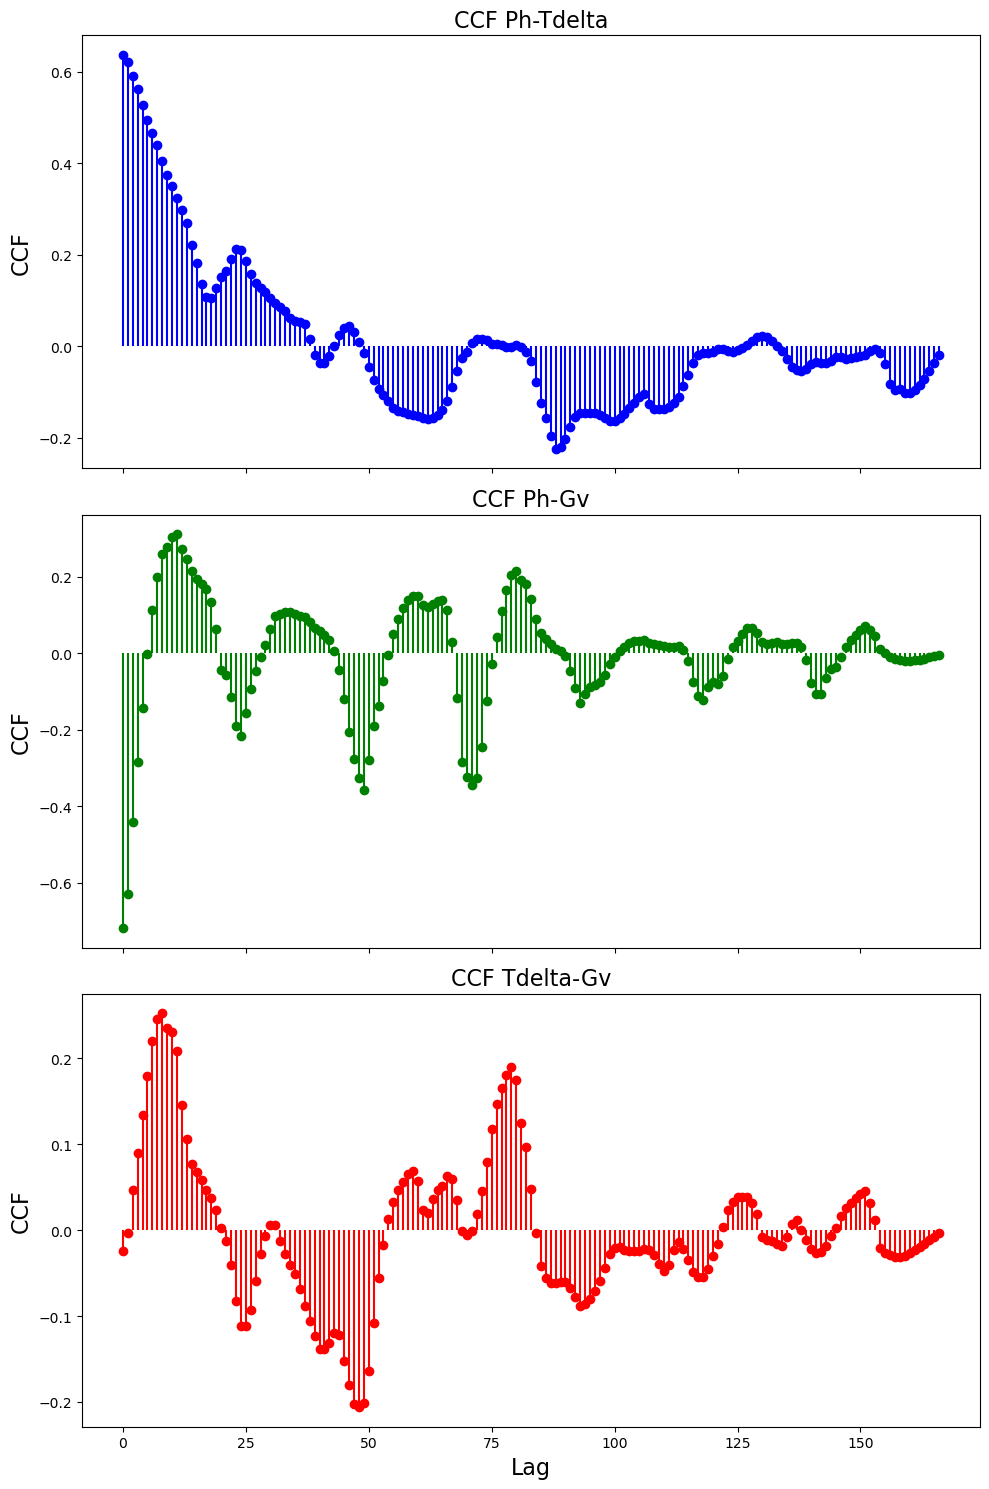

In [29]:
# cross-correlation plots between Ph, Tdelta, and Gv
from statsmodels.tsa.stattools import ccf

ccf_ph_tdelta = ccf(train_df['Ph'], train_df['Tdelta'], adjusted=False)
ccf_ph_gv = ccf(train_df['Ph'], train_df['Gv'], adjusted=False)
ccf_tdelta_gv = ccf(train_df['Tdelta'], train_df['Gv'], adjusted=False)

fig, axs = plt.subplots(3, 1, figsize=(10, 15), sharex=True)
axs[0].stem(ccf_ph_tdelta, linefmt='blue', markerfmt='bo', basefmt=' ')
axs[0].set_title('CCF Ph-Tdelta', fontsize=16)
axs[0].set_ylabel('CCF', fontsize=16)

axs[1].stem(ccf_ph_gv, linefmt='green', markerfmt='go', basefmt=' ')
axs[1].set_title('CCF Ph-Gv', fontsize=16)
axs[1].set_ylabel('CCF', fontsize=16)

axs[2].stem(ccf_tdelta_gv, linefmt='red', markerfmt='ro', basefmt=' ')
axs[2].set_title('CCF Tdelta-Gv', fontsize=16)
axs[2].set_xlabel('Lag', fontsize=16)
axs[2].set_ylabel('CCF', fontsize=16)

plt.tight_layout()
plt.savefig('cross_correlation_plots.png', dpi=300, bbox_inches='tight')
plt.show()

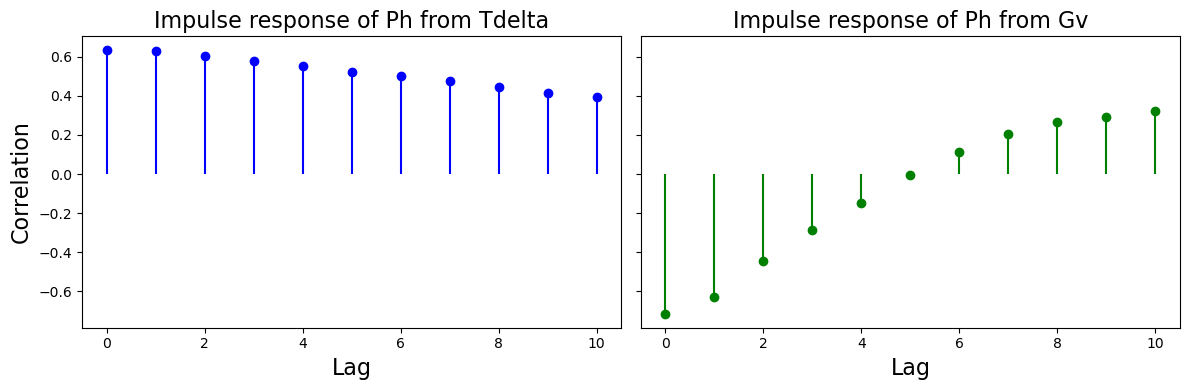

In [40]:
# impulse responses up to lag 10
max_lag = 10
ir_tdelta = [np.corrcoef(train_df["Tdelta"].shift(lag).dropna(), train_df["Ph"][lag:])[0, 1] for lag in range(max_lag + 1)]
ir_gv = [np.corrcoef(train_df["Gv"].shift(lag).dropna(), train_df["Ph"][lag:])[0, 1] for lag in range(max_lag + 1)]

fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

ax[0].stem(range(max_lag + 1), ir_tdelta, linefmt='blue', markerfmt='bo', basefmt=' ')
ax[0].set_title("Impulse response of Ph from Tdelta", fontsize=16)
ax[0].set_xlabel("Lag", fontsize=16)
ax[0].set_ylabel("Correlation", fontsize=16)

ax[1].stem(range(max_lag + 1), ir_gv, linefmt='green', markerfmt='go', basefmt=' ')
ax[1].set_title("Impulse response of Ph from Gv", fontsize=16)
ax[1].set_xlabel("Lag", fontsize=16)

plt.tight_layout()
plt.show()
# save the figure
fig.savefig('impulse_response_plots.png', dpi=300, bbox_inches='tight')


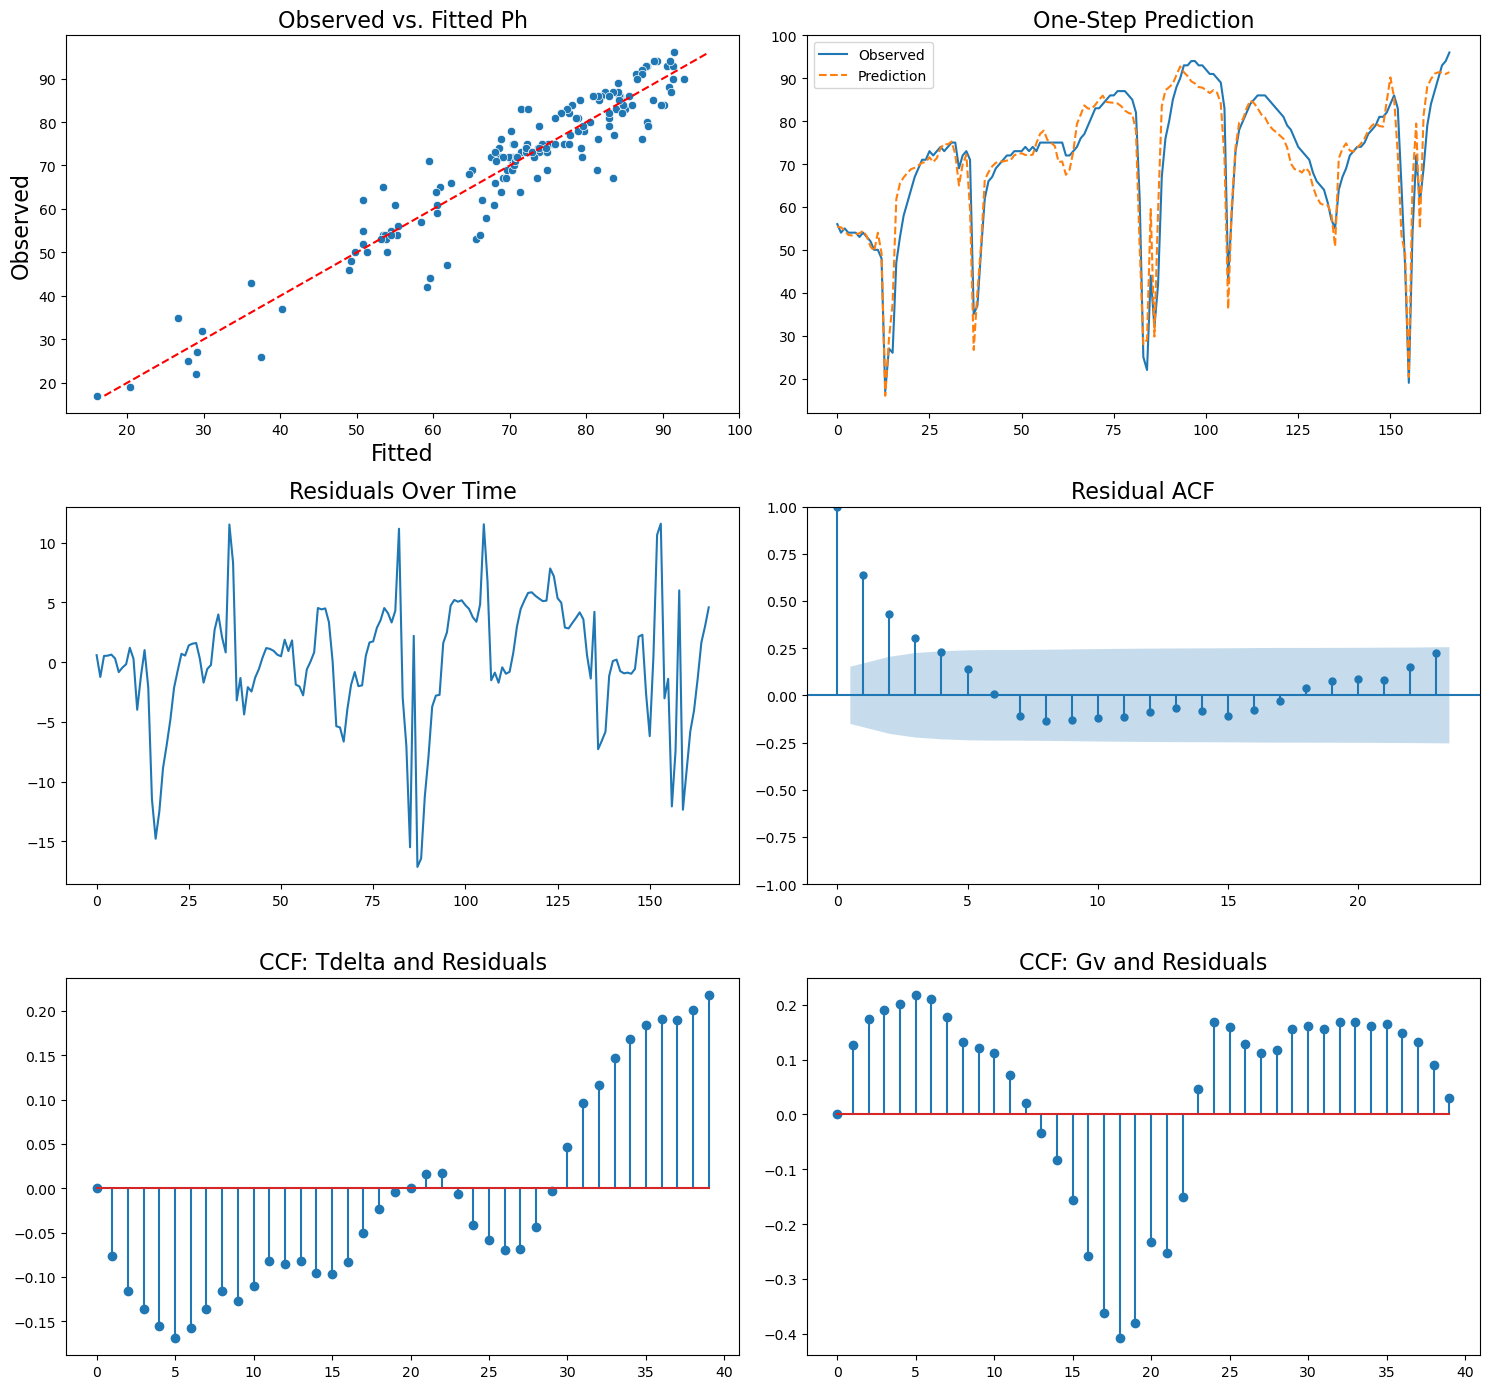

In [33]:
# linear regression model
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import ccf
import statsmodels.api as sm


X = train_df[["Tdelta", "Gv"]]
X = sm.add_constant(X)
y = train_df["Ph"]

# Fit model
model = sm.OLS(y, X).fit()
y_pred = model.fittedvalues
residuals = model.resid

# CCFs
ccf_tdelta = ccf(train_df["Tdelta"], residuals)[:40]
ccf_gv = ccf(train_df["Gv"], residuals)[:40]

fig, axs = plt.subplots(3, 2, figsize=(15, 14))

sns.scatterplot(x=y_pred, y=y, ax=axs[0, 0])
axs[0, 0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
axs[0, 0].set_title("Observed vs. Fitted Ph", fontsize=16)
axs[0, 0].set_xlabel("Fitted", fontsize=16)
axs[0, 0].set_ylabel("Observed", fontsize=16)

axs[0, 1].plot(y.index, y, label="Observed")
axs[0, 1].plot(y.index, y_pred, label="Prediction", linestyle='--')
axs[0, 1].legend()
axs[0, 1].set_title("One-Step Prediction", fontsize=16)

axs[1, 0].plot(residuals.index, residuals)
axs[1, 0].set_title("Residuals Over Time", fontsize=16)

plot_acf(residuals, ax=axs[1, 1])
axs[1, 1].set_title("Residual ACF", fontsize=16)

axs[2, 0].stem(range(len(ccf_tdelta)), ccf_tdelta)
axs[2, 0].set_title("CCF: Tdelta and Residuals", fontsize=16)

axs[2, 1].stem(range(len(ccf_gv)), ccf_gv)
axs[2, 1].set_title("CCF: Gv and Residuals", fontsize=16)

plt.tight_layout()
plt.show()
model.summary()

# save the figure
fig.savefig('linear_regr.png', dpi=300, bbox_inches='tight')


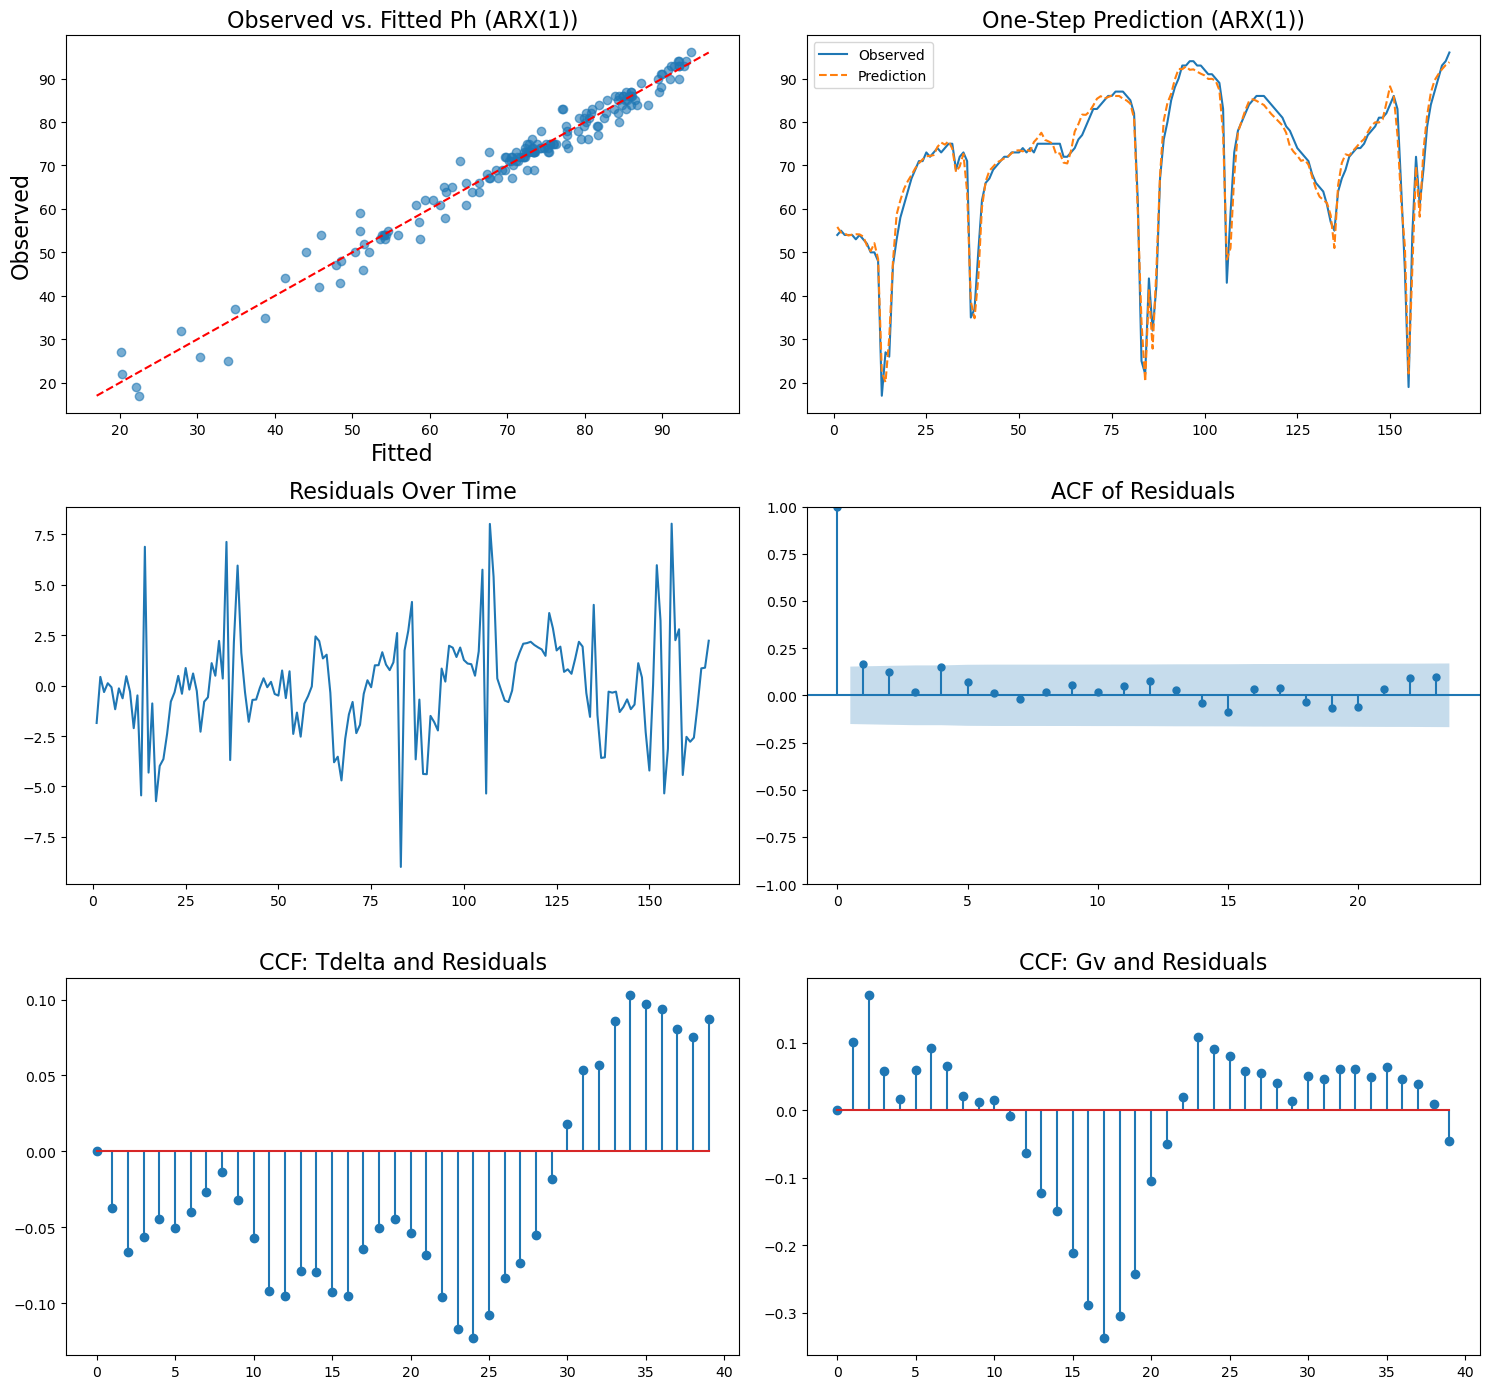

In [34]:
# ARX(1) model
train_arx1 = train_df.copy()
train_arx1["Ph_lag1"] = train_arx1["Ph"].shift(1)
train_arx1 = train_arx1.dropna()

X_arx1 = train_arx1[["Ph_lag1", "Tdelta", "Gv"]]
X_arx1 = sm.add_constant(X_arx1)
y_arx1 = train_arx1["Ph"]

model_arx1 = sm.OLS(y_arx1, X_arx1).fit()
y_pred_arx1 = model_arx1.fittedvalues
resid_arx1 = model_arx1.resid

ccf_tdelta_arx1 = ccf(train_arx1["Tdelta"], resid_arx1)[:40]
ccf_gv_arx1 = ccf(train_arx1["Gv"], resid_arx1)[:40]

fig, axs = plt.subplots(3, 2, figsize=(15, 14))

axs[0, 0].scatter(y_pred_arx1, y_arx1, alpha=0.6)
axs[0, 0].plot([y_arx1.min(), y_arx1.max()], [y_arx1.min(), y_arx1.max()], 'r--')
axs[0, 0].set_title("Observed vs. Fitted Ph (ARX(1))", fontsize=16)
axs[0, 0].set_xlabel("Fitted", fontsize=16)
axs[0, 0].set_ylabel("Observed", fontsize=16)

axs[0, 1].plot(y_arx1.index, y_arx1, label="Observed")
axs[0, 1].plot(y_arx1.index, y_pred_arx1, label="Prediction", linestyle='--')
axs[0, 1].legend()
axs[0, 1].set_title("One-Step Prediction (ARX(1))", fontsize=16)

axs[1, 0].plot(resid_arx1.index, resid_arx1)
axs[1, 0].set_title("Residuals Over Time", fontsize=16)

plot_acf(resid_arx1, ax=axs[1, 1])
axs[1, 1].set_title("ACF of Residuals", fontsize=16)

axs[2, 0].stem(range(len(ccf_tdelta_arx1)), ccf_tdelta_arx1)
axs[2, 0].set_title("CCF: Tdelta and Residuals", fontsize=16)

axs[2, 1].stem(range(len(ccf_gv_arx1)), ccf_gv_arx1)
axs[2, 1].set_title("CCF: Gv and Residuals", fontsize=16)

plt.tight_layout()
plt.show()

model_arx1.summary()

# save the figure
fig.savefig('arx1_model.png', dpi=300, bbox_inches='tight')


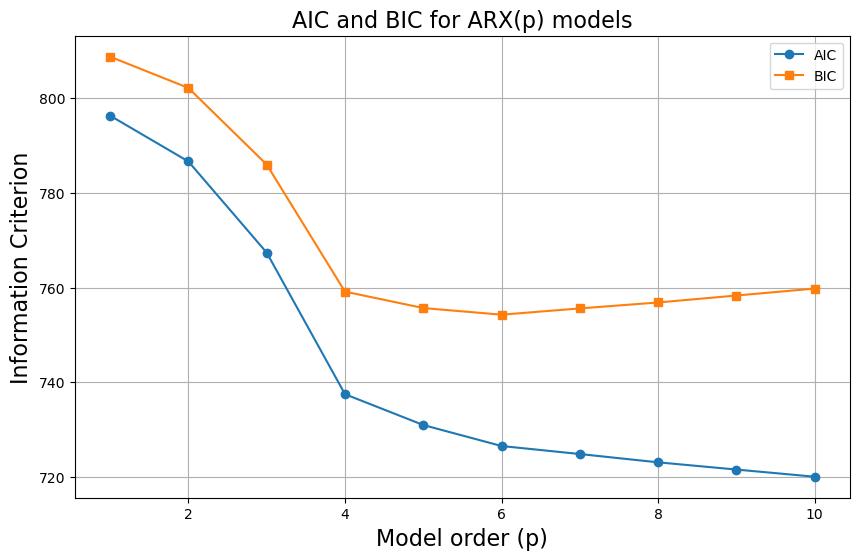

<Figure size 640x480 with 0 Axes>

In [35]:
# Fit ARX(p) models for p = 1 to 10 and collect AIC/BIC
max_order = 10
aic_vals = []
bic_vals = []

for p in range(1, max_order + 1):
    df_lagged = train_df.copy()
    for lag in range(1, p + 1):
        df_lagged[f"Ph_lag{lag}"] = df_lagged["Ph"].shift(lag)
    df_lagged = df_lagged.dropna()

    predictors = [f"Ph_lag{lag}" for lag in range(1, p + 1)] + ["Tdelta", "Gv"]
    X_p = sm.add_constant(df_lagged[predictors])
    y_p = df_lagged["Ph"]

    model_p = sm.OLS(y_p, X_p).fit()
    aic_vals.append(model_p.aic)
    bic_vals.append(model_p.bic)


plt.figure(figsize=(10, 6))
plt.plot(range(1, max_order + 1), aic_vals, marker='o', label='AIC')
plt.plot(range(1, max_order + 1), bic_vals, marker='s', label='BIC')
plt.xlabel("Model order (p)", fontsize=16)
plt.ylabel("Information Criterion", fontsize=16)
plt.title("AIC and BIC for ARX(p) models", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

# save the figure
plt.savefig('aic_bic.png', dpi=300, bbox_inches='tight')

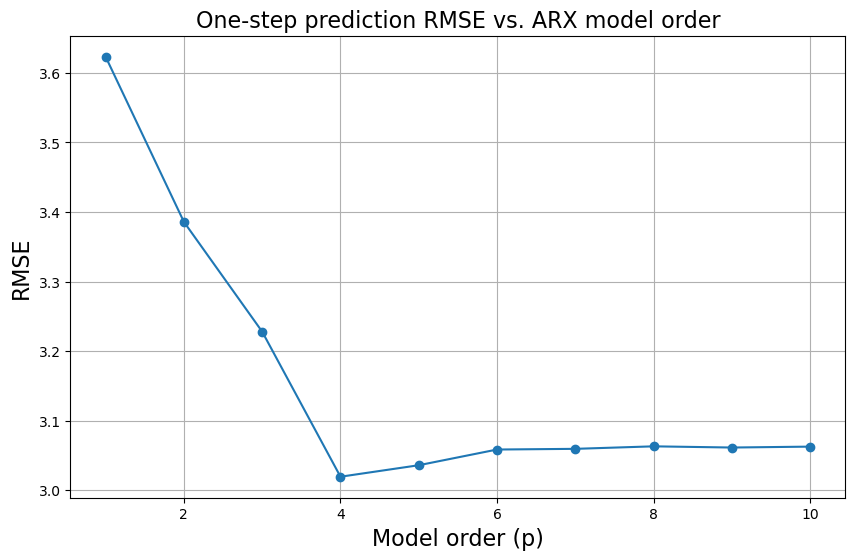

<Figure size 640x480 with 0 Axes>

In [36]:
# Evaluate RMSE for ARX(p) models on test set
from sklearn.metrics import mean_squared_error

max_order = 10
rmse_vals = []


for p in range(1, max_order + 1):

    # create lags for training set
    train_lagged = train_df.copy()
    for lag in range(1, p + 1):
        train_lagged[f"Ph_lag{lag}"] = train_lagged["Ph"].shift(lag)
    train_lagged = train_lagged.dropna()

    # train the arx models on the training data
    predictors = [f"Ph_lag{lag}" for lag in range(1, p + 1)] + ["Tdelta", "Gv"]
    X_train = sm.add_constant(train_lagged[predictors])
    y_train = train_lagged["Ph"]
    
    model = sm.OLS(y_train, X_train).fit()

    # create lags for test set
    full_data = pd.concat([train_df, test_df])
    test_lagged = full_data.copy()
    for lag in range(1, p + 1):
        test_lagged[f"Ph_lag{lag}"] = test_lagged["Ph"].shift(lag)
    test_lagged = test_lagged.loc[test_df.index[0]:].dropna()

    X_test = sm.add_constant(test_lagged[predictors])
    y_test = test_lagged["Ph"]

    # one-step predictions
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_vals.append(rmse)

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_order + 1), rmse_vals, marker='o')
plt.xlabel("Model order (p)", fontsize=16)
plt.ylabel("RMSE", fontsize=16)
plt.title("One-step prediction RMSE vs. ARX model order", fontsize=16)
plt.grid(True)
plt.show()

# save the figure
plt.savefig('rmse_one_step.png', dpi=300, bbox_inches='tight')


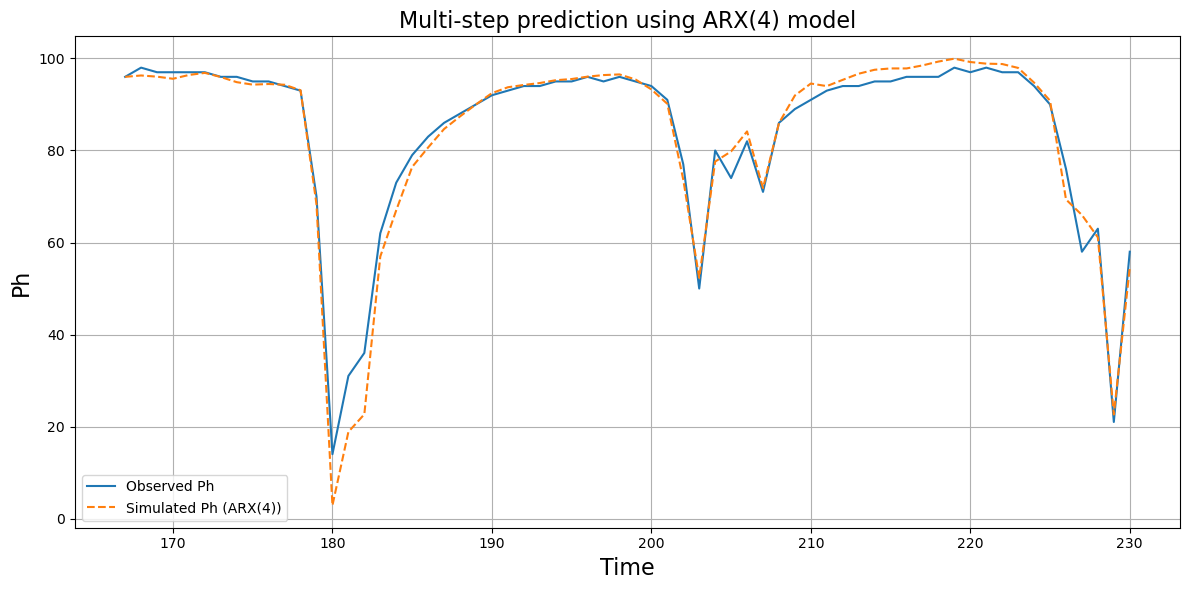

<Figure size 640x480 with 0 Axes>

In [38]:
# multi-step prediction

# prepare ARX(4) model
p = 4
train_arx4 = train_df.copy()
for lag in range(1, p + 1):
    train_arx4[f"Ph_lag{lag}"] = train_arx4["Ph"].shift(lag)
train_arx4 = train_arx4.dropna()

X_train = train_arx4[[f"Ph_lag{i}" for i in range(1, p + 1)] + ["Tdelta", "Gv"]]
X_train = sm.add_constant(X_train)
y_train = train_arx4["Ph"]

# fit model on training data
model_arx4 = sm.OLS(y_train, X_train).fit()

# multi-step simulation on test set
history = train_df[-p:].copy()
sim_steps = len(test_df)
simulated_ph = []

for t in range(sim_steps):
    lags = [history["Ph"].iloc[-i] for i in range(1, p + 1)]
    tdelta = test_df["Tdelta"].iloc[t]
    gv = test_df["Gv"].iloc[t]
    x_input = [1] + lags + [tdelta, gv]
    pred = model_arx4.predict(np.array(x_input).reshape(1, -1))[0]
    simulated_ph.append(pred)
    next_row = pd.Series({"Ph": pred, "Tdelta": tdelta, "Gv": gv})
    history = pd.concat([history, next_row.to_frame().T]).iloc[1:]

# plot
plt.figure(figsize=(12, 6))
plt.plot(test_df.index, test_df["Ph"], label="Observed Ph")
plt.plot(test_df.index, simulated_ph, label="Simulated Ph (ARX(4))", linestyle='--')
plt.title("Multi-step prediction using ARX(4) model", fontsize=16)
plt.xlabel("Time", fontsize=16)
plt.ylabel("Ph", fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# save the figure
plt.savefig('multi_step_prediction.png', dpi=300, bbox_inches='tight')

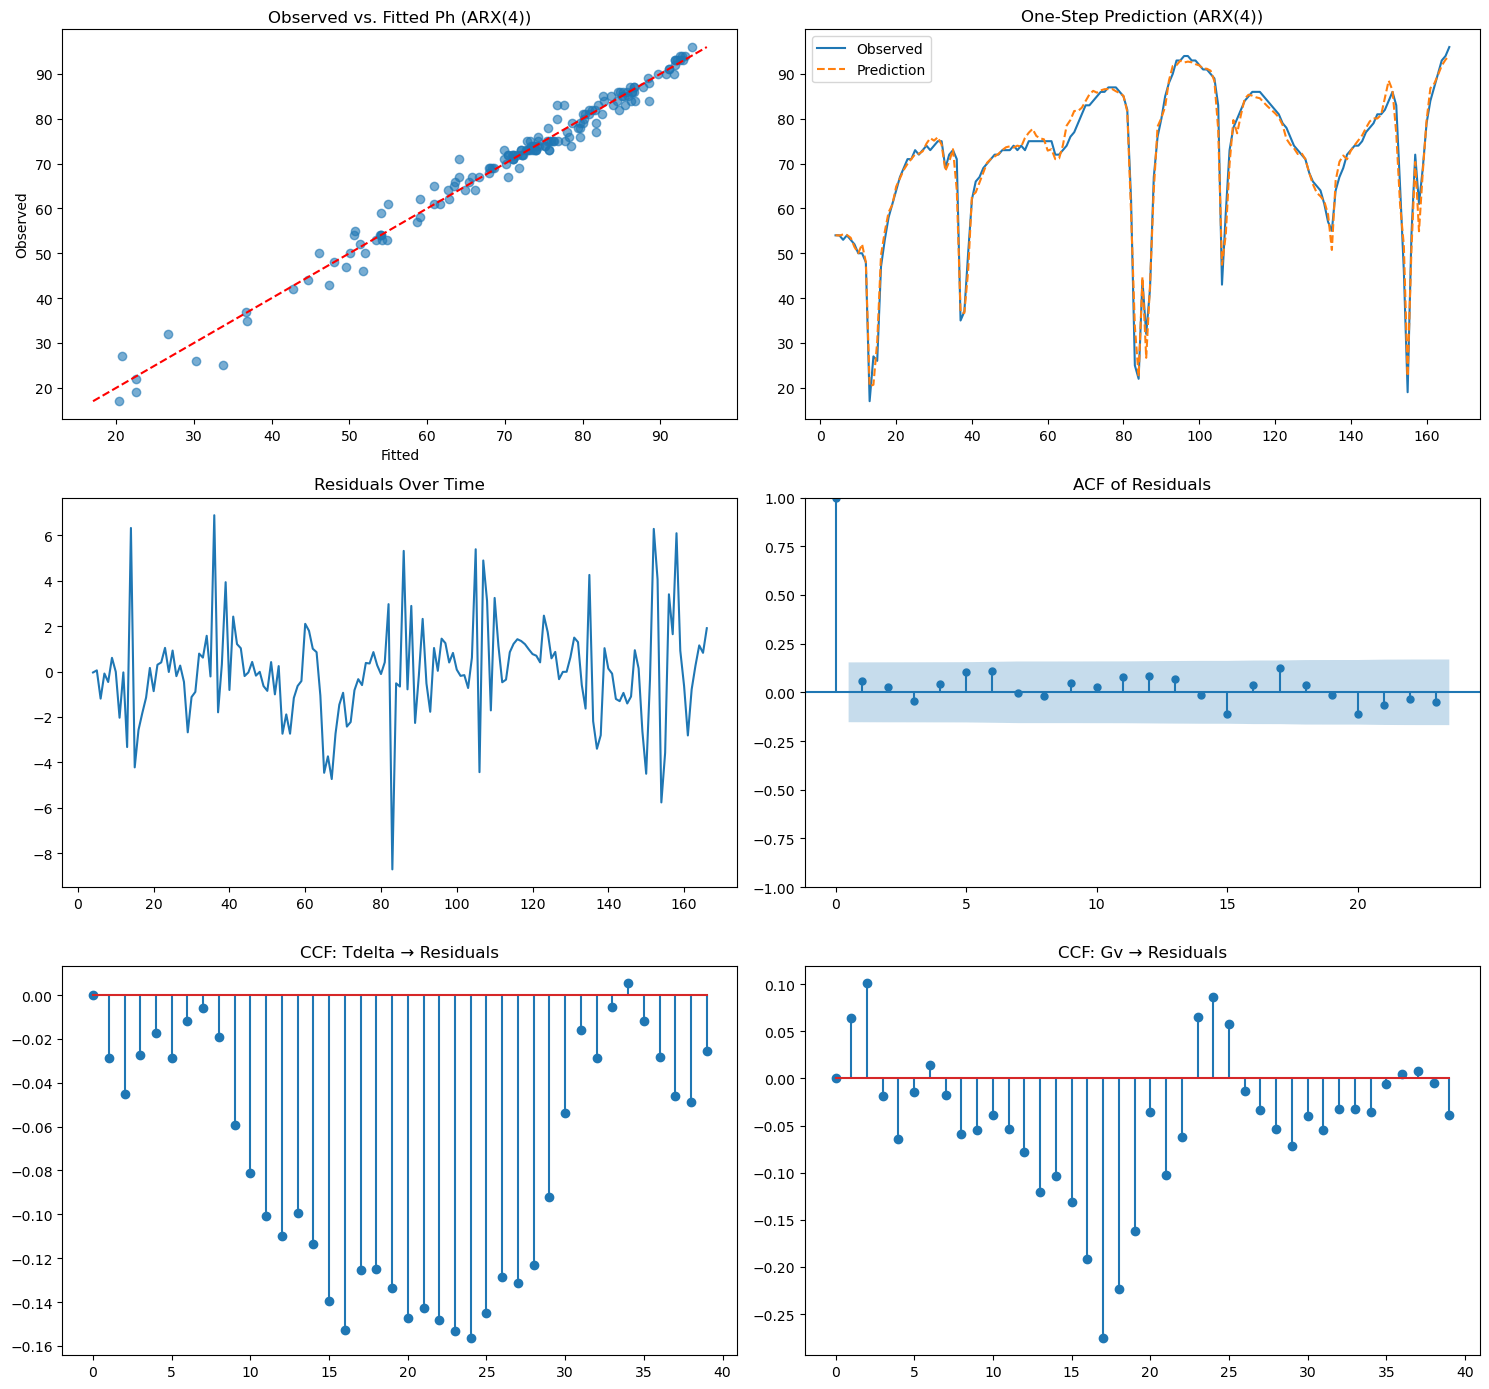

In [21]:

p = 4
train_arx4 = train_df.copy()
for lag in range(1, p + 1):
    train_arx4[f"Ph_lag{lag}"] = train_arx4["Ph"].shift(lag)
train_arx4 = train_arx4.dropna()

X_arx4 = train_arx4[[f"Ph_lag{i}" for i in range(1, p + 1)] + ["Tdelta", "Gv"]]
X_arx4 = sm.add_constant(X_arx4)
y_arx4 = train_arx4["Ph"]

# Fit model
model_arx4 = sm.OLS(y_arx4, X_arx4).fit()
y_pred_arx4 = model_arx4.fittedvalues
resid_arx4 = model_arx4.resid

# Compute CCFs
ccf_tdelta_arx4 = ccf(train_arx4["Tdelta"], resid_arx4)[:40]
ccf_gv_arx4 = ccf(train_arx4["Gv"], resid_arx4)[:40]

# Plotting
fig, axs = plt.subplots(3, 2, figsize=(15, 14))

# Observed vs Fitted
axs[0, 0].scatter(y_pred_arx4, y_arx4, alpha=0.6)
axs[0, 0].plot([y_arx4.min(), y_arx4.max()], [y_arx4.min(), y_arx4.max()], 'r--')
axs[0, 0].set_title("Observed vs. Fitted Ph (ARX(4))")
axs[0, 0].set_xlabel("Fitted")
axs[0, 0].set_ylabel("Observed")

# One-step prediction
axs[0, 1].plot(y_arx4.index, y_arx4, label="Observed")
axs[0, 1].plot(y_arx4.index, y_pred_arx4, label="Prediction", linestyle='--')
axs[0, 1].legend()
axs[0, 1].set_title("One-Step Prediction (ARX(4))")

# Residuals over time
axs[1, 0].plot(resid_arx4.index, resid_arx4)
axs[1, 0].set_title("Residuals Over Time")

# ACF of residuals
plot_acf(resid_arx4, ax=axs[1, 1])
axs[1, 1].set_title("ACF of Residuals")

# CCF: Tdelta → Residuals
axs[2, 0].stem(range(len(ccf_tdelta_arx4)), ccf_tdelta_arx4)
axs[2, 0].set_title("CCF: Tdelta → Residuals")

# CCF: Gv → Residuals
axs[2, 1].stem(range(len(ccf_gv_arx4)), ccf_gv_arx4)
axs[2, 1].set_title("CCF: Gv → Residuals")

plt.tight_layout()
plt.show()
